In [1]:
# Uncomment the line below and run this only if you're using Google Collab
# !pip install -q py-feat

In [2]:
# Import the Detector class from the feat library
from feat import Detector

# Create an instance of the Detector class
detector = Detector(
    # Specify the face detection model to use (RetinaFace)
    face_model="retinaface",
    # Specify the landmark detection model to use (MobileFaceNet)
    landmark_model="mobilefacenet",
    # Specify the AU (Action Unit) model to use (XGBoost)
    au_model='xgb',
    # Specify the emotion detection model to use (ResMaskNet)
    emotion_model="resmasknet",
    # Specify the face pose estimation model to use (Img2Pose)
    facepose_model="img2pose",
)

# Display the detector instance
detector

C:\Users\Quirante\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
100%|██████████| 176/176 [00:00<00:00, 175845.05it/s]
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Quirante/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 11.8MB/s]


feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose)

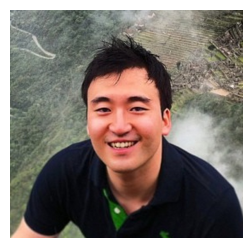

In [9]:
# Import necessary modules from the feat library
from feat.utils.io import get_test_data_path
from feat.plotting import imshow
import os

# Helper function to point to the test data folder
test_data_dir = get_test_data_path()

# Get the full path of the "single_face.jpg" image located in the test data folder
single_face_img_path = os.path.join(test_data_dir, "single_face.jpg")

# Plot the image using the `imshow` function from the feat library
imshow(single_face_img_path)


In [10]:
# Use the `detector` instance to detect faces in the "single_face.jpg" image
single_face_prediction = detector.detect_image(single_face_img_path)

# Display the results of the face detection
single_face_prediction


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,192.507716,140.455324,179.352746,259.257723,0.999708,186.667095,187.426722,189.18008,193.490039,202.441496,...,0.138215,0.000498,0.000025,0.001916,0.990629,0.000027,0.006876,0.00003,C:\Users\Quirante\anaconda3\Lib\site-packages\...,0


In [11]:
# Access the face bounding box (coordinates) in the single_face_prediction object
single_face_prediction.facebox

C:\Users\Quirante\anaconda3\Lib\site-packages\feat\data.py:618: DeprecationWarning: Fex.facebox has been renamed to Fex.faceboxes
  warnings.warn(


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore
0,192.507716,140.455324,179.352746,259.257723,0.999708


In [12]:
# Access the Action Units (AUs) detected in the face in the single_face_prediction object
single_face_prediction.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.632567,0.27765,0.062394,0.222518,0.930385,1.0,0.363805,0.745353,1.0,0.955968,0.736171,0.104619,0.15823,1.0,0.159763,0.012713,0.999784,0.835478,0.023594,0.138215


In [13]:
# Access the detected emotions for the face
single_face_prediction.emotions


,anger,disgust,fear,happiness,sadness,surprise,neutral
0,0.000498,0.000025,0.001916,0.990629,0.000027,0.006876,0.00003


In [14]:
# Access the face pose (in degrees) in the single_face_prediction object
single_face_prediction.facepose

C:\Users\Quirante\anaconda3\Lib\site-packages\feat\data.py:507: DeprecationWarning: Fex.facepose has now been renamed to Fex.poses
  warnings.warn(


,Pitch,Roll,Yaw
0,0.81182,-3.737929,6.101122


In [15]:
# Save the results to a CSV file named "output.csv" without including the index
single_face_prediction.to_csv("output.csv", index=False)

In [16]:
# Import the `read_feat` function from the feat library for reading the CSV file
from feat.utils.io import read_feat

# Use the `read_feat` function to read the CSV file "output.csv" into a Pandas DataFrame
input_prediction = read_feat("output.csv")

# Display the results of reading the CSV file as a Pandas DataFrame
input_prediction


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,192.507716,140.455324,179.352746,259.257723,0.999708,186.667095,187.426722,189.18008,193.490039,202.441496,...,0.138215,0.000498,0.000025,0.001916,0.990629,0.000027,0.006876,0.00003,C:\Users\Quirante\anaconda3\Lib\site-packages\...,0


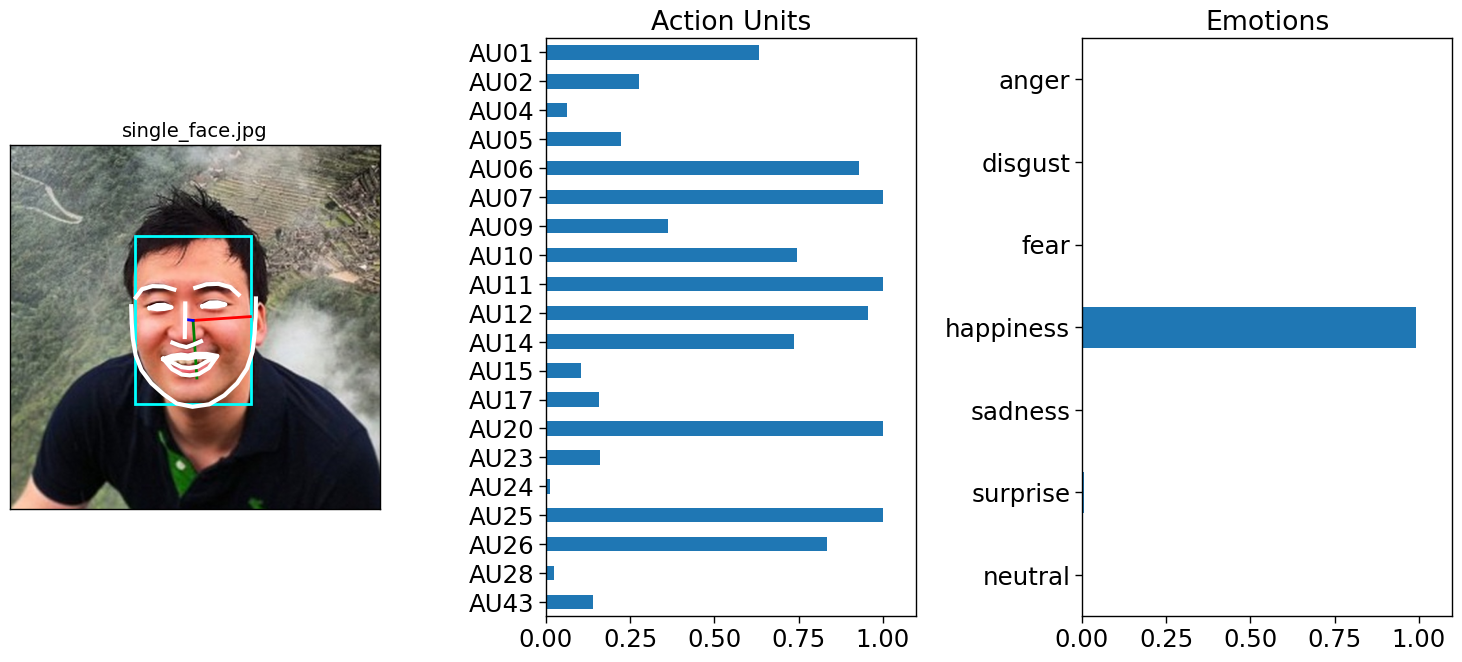

In [17]:
# Generate visualizations of the face detections with optional face pose information
# by calling the plot_detections method on the single_face_prediction object
figs = single_face_prediction.plot_detections(poses=True)


100%|██████████| 20498112/20498112 [00:01<00:00, 11809268.56it/s]


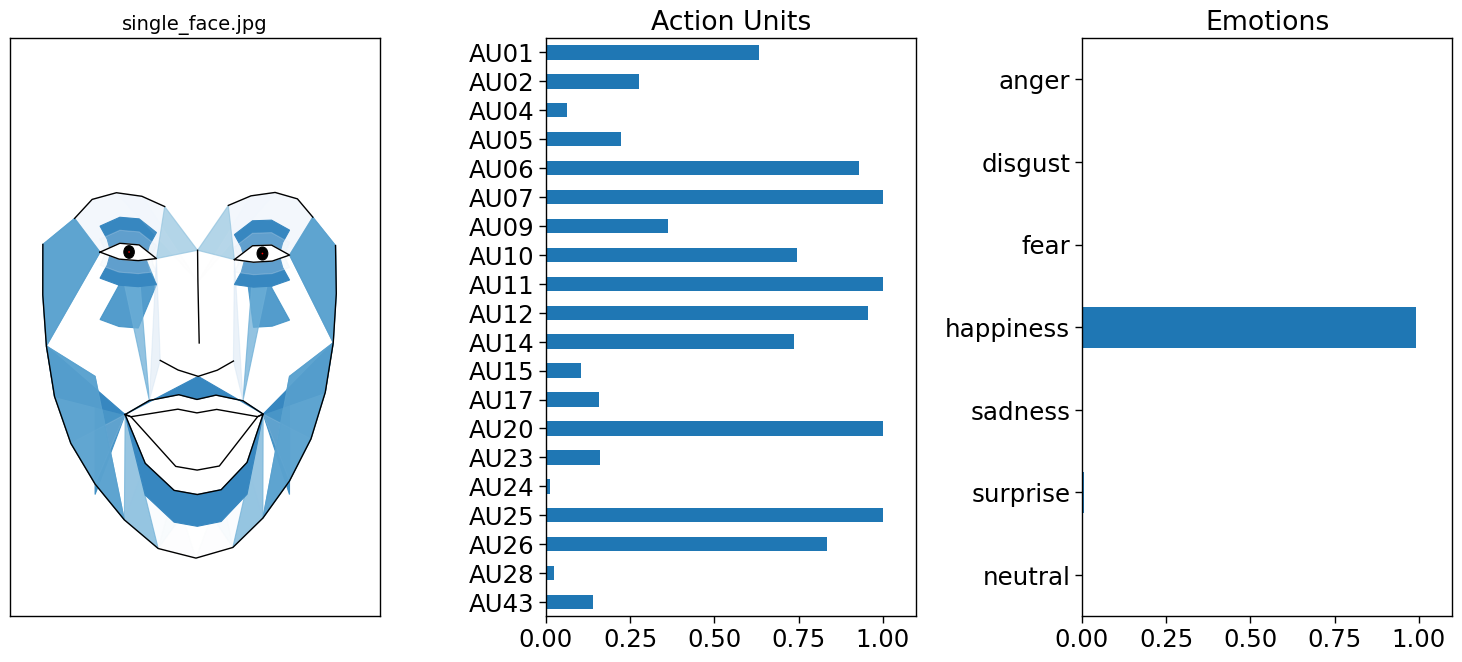

In [18]:
# Generate visualizations of the face detections with an overlay of Action Units (AUs)
# and muscle information, and store the figures in the 'figs' variable
figs = single_face_prediction.plot_detections(faces='aus', muscles=True)


In [19]:
# Get the full path of the "multi_face.jpg" image located in the test data folder
multi_face_image_path = os.path.join(test_data_dir, "multi_face.jpg")
# Use the `detector` instance to detect faces in the "multi_face.jpg" image
multi_face_prediction = detector.detect_image(multi_face_image_path)
# Display the results of the face detection
multi_face_prediction

100%|██████████| 1/1 [00:03<00:00,  3.92s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,683.340962,288.568915,105.420755,134.124911,0.999817,685.483099,683.345557,682.124418,682.747507,686.454509,...,0.378646,0.000319,0.003674,0.000121,0.992675,0.000280,0.002700,0.000231,C:\Users\Quirante\anaconda3\Lib\site-packages\...,0
1,531.699620,309.095124,97.330348,123.796507,0.999361,533.869643,532.053229,531.433829,532.123172,534.835996,...,0.751587,0.000161,0.000072,0.000070,0.999318,0.000084,0.000276,0.000017,C:\Users\Quirante\anaconda3\Lib\site-packages\...,0
2,316.664986,236.808266,91.607044,120.287714,0.998966,313.316128,314.463390,316.817667,320.903578,327.532338,...,0.100871,0.000062,0.000048,0.000080,0.991051,0.000030,0.008696,0.000033,C:\Users\Quirante\anaconda3\Lib\site-packages\...,0
3,435.052600,211.107536,81.976803,101.041442,0.994319,436.109466,436.977502,438.472255,440.473766,443.726039,...,0.150066,0.014431,0.009055,0.000090,0.036599,0.005885,0.003246,0.930694,C:\Users\Quirante\anaconda3\Lib\site-packages\...,0
4,220.073854,64.653720,85.268424,110.928962,0.994262,219.333061,217.626406,216.715176,216.977729,219.749611,...,0.139765,0.000048,0.004724,0.000144,0.992502,0.000013,0.002545,0.000024,C:\Users\Quirante\anaconda3\Lib\site-packages\...,0


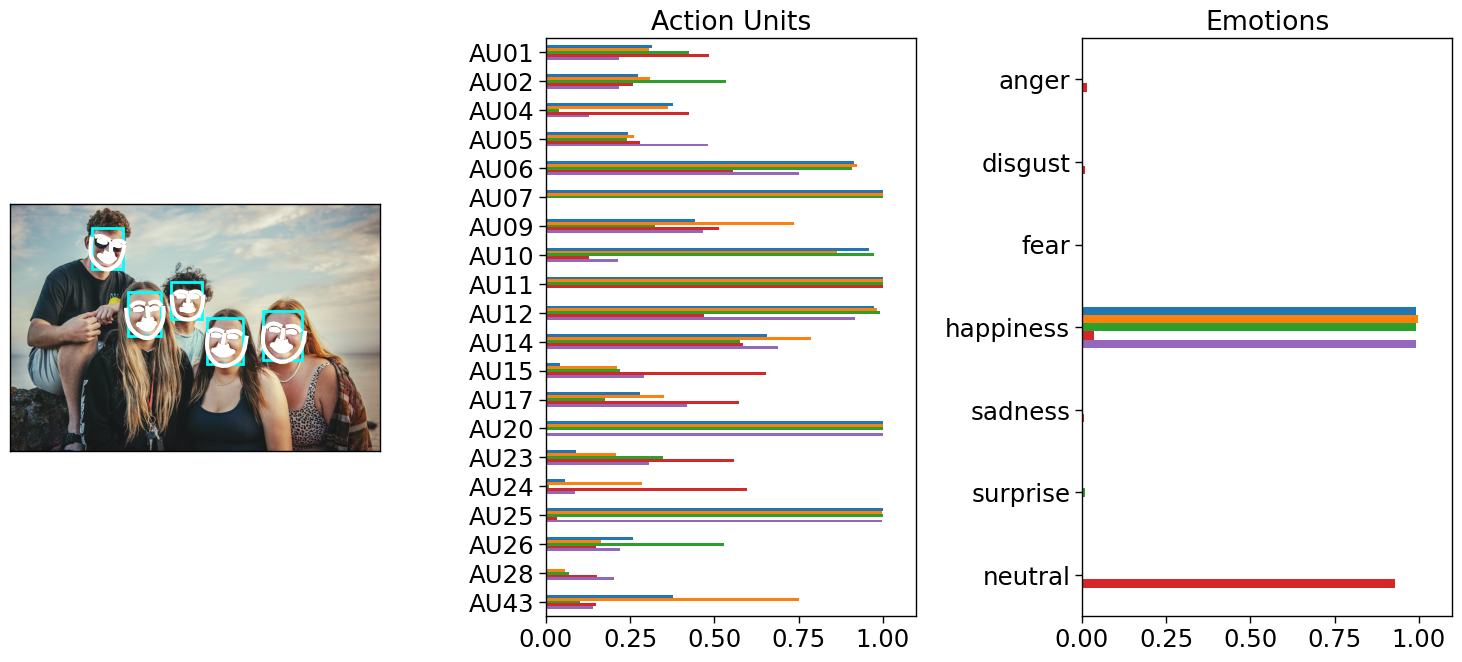

In [20]:
# Generate visualizations of the face detections in the "multi_face.jpg" image
# with the option to exclude titles (add_titles=False)
figs = multi_face_prediction.plot_detections(add_titles=False)



In [21]:
# Create a list of image paths, including "single_face.jpg" and "multi_face.jpg"
img_list = [single_face_img_path, multi_face_image_path]

# Use the `detector` instance to detect faces in the list of images, one at a time (batch_size=1)
mixed_prediction = detector.detect_image(img_list, batch_size=1)

# Display the results of face detection on the list of images
mixed_prediction


100%|██████████| 2/2 [00:05<00:00,  2.69s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,192.507716,140.455324,179.352746,259.257723,0.999708,186.667095,187.426722,189.180080,193.490039,202.441496,...,0.138215,0.000498,0.000025,0.001916,0.990629,0.000027,0.006876,0.000030,C:\Users\Quirante\anaconda3\Lib\site-packages\...,0
1,683.340962,288.568915,105.420755,134.124911,0.999817,685.483099,683.345557,682.124418,682.747507,686.454509,...,0.378646,0.000319,0.003674,0.000121,0.992675,0.000280,0.002700,0.000231,C:\Users\Quirante\anaconda3\Lib\site-packages\...,1
2,531.699620,309.095124,97.330348,123.796507,0.999361,533.869643,532.053229,531.433829,532.123172,534.835996,...,0.751587,0.000161,0.000072,0.000070,0.999318,0.000084,0.000276,0.000017,C:\Users\Quirante\anaconda3\Lib\site-packages\...,1
3,316.664986,236.808266,91.607044,120.287714,0.998966,313.316128,314.463390,316.817667,320.903578,327.532338,...,0.100871,0.000062,0.000048,0.000080,0.991051,0.000030,0.008696,0.000033,C:\Users\Quirante\anaconda3\Lib\site-packages\...,1
4,435.052600,211.107536,81.976803,101.041442,0.994319,436.109466,436.977502,438.472255,440.473766,443.726039,...,0.150066,0.014431,0.009055,0.000090,0.036599,0.005885,0.003246,0.930694,C:\Users\Quirante\anaconda3\Lib\site-packages\...,1
5,220.073854,64.653720,85.268424,110.928962,0.994262,219.333061,217.626406,216.715176,216.977729,219.749611,...,0.139765,0.000048,0.004724,0.000144,0.992502,0.000013,0.002545,0.000024,C:\Users\Quirante\anaconda3\Lib\site-packages\...,1


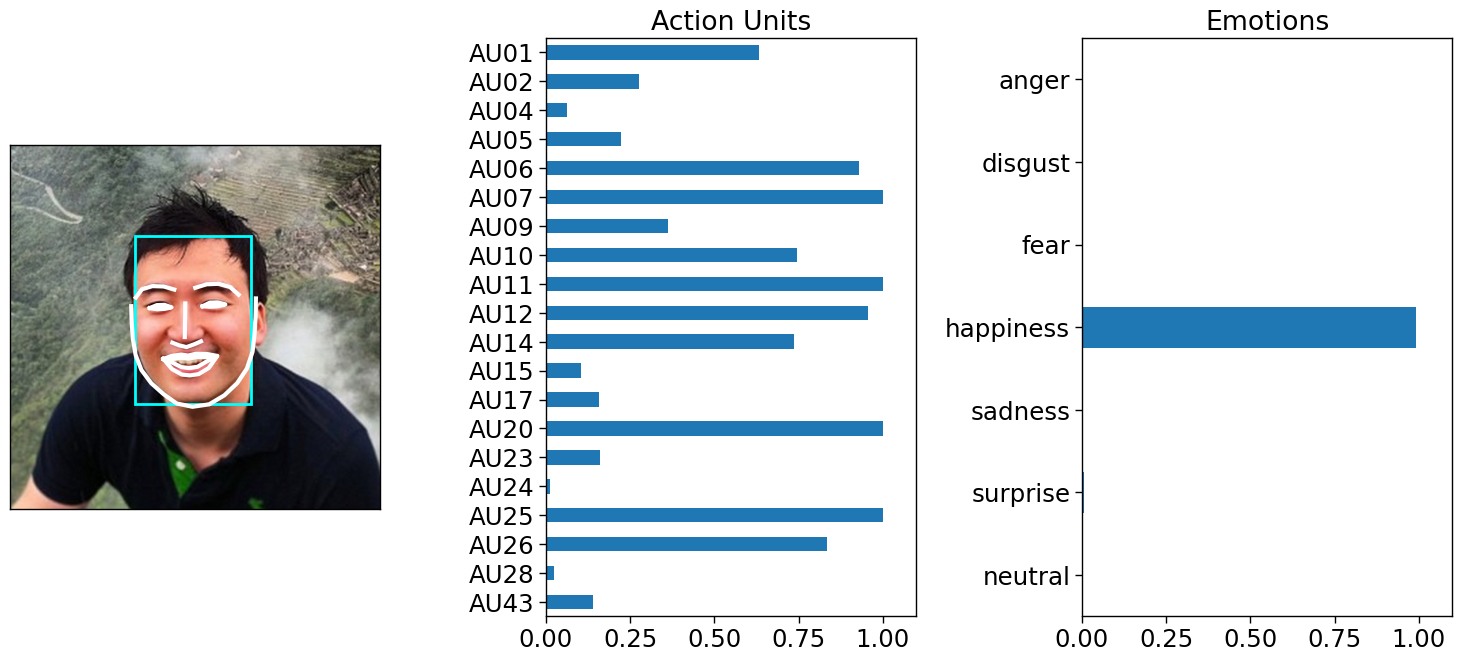

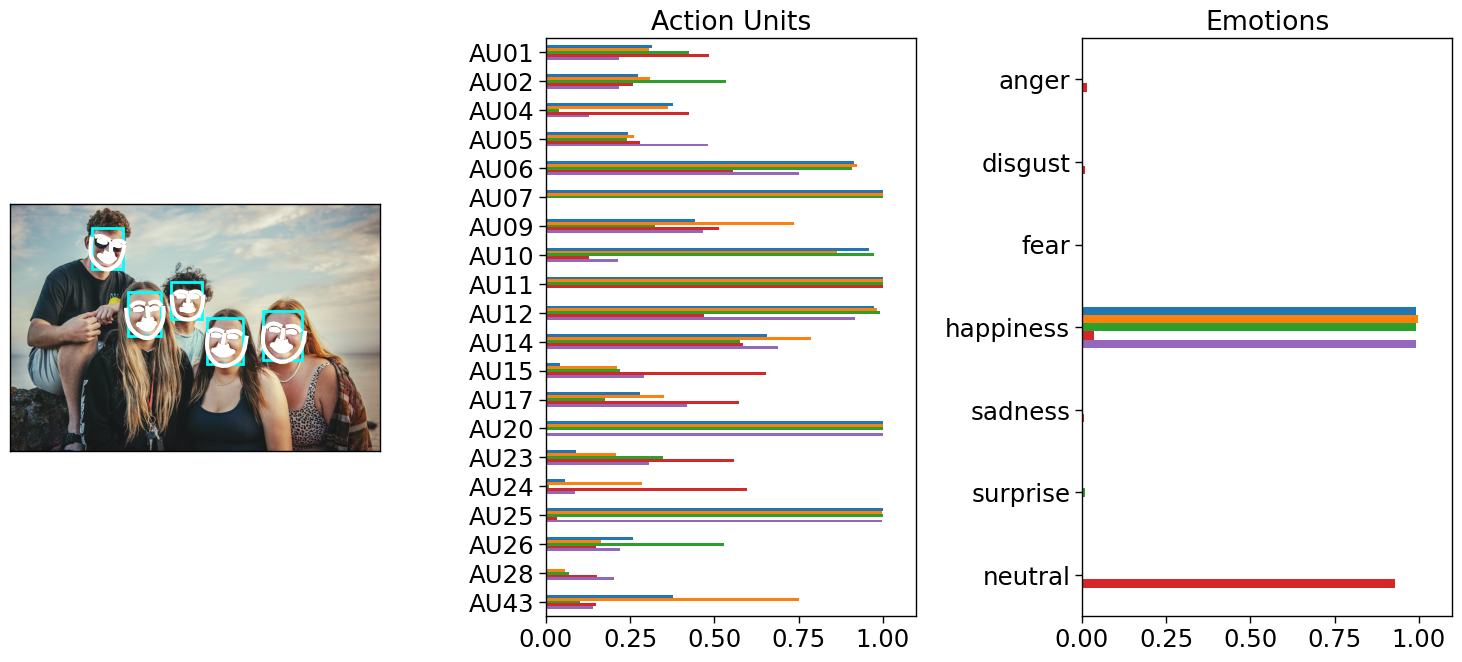

In [23]:
# Generate visualizations of the face detections in the list of images (mixed_prediction)
# with the option to exclude titles (add_titles=False)
figs = mixed_prediction.plot_detections(add_titles=False)


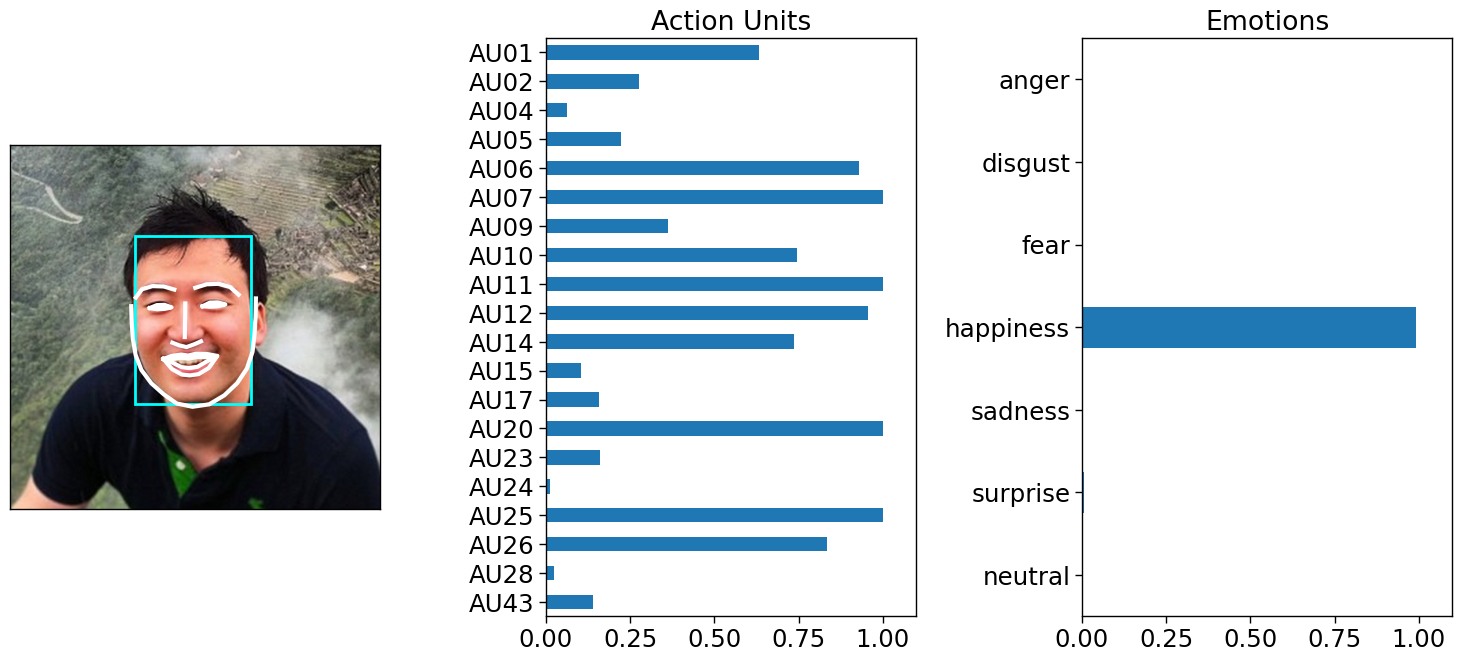

In [24]:
# Extract the first row of face detection data from the mixed_prediction DataFrame
first_row_detection = mixed_prediction.loc[0]

# Generate visualizations of the face detections corresponding to the first row
# of the Fex data with the option to exclude titles (add_titles=False)
figs = first_row_detection.plot_detections(add_titles=False)


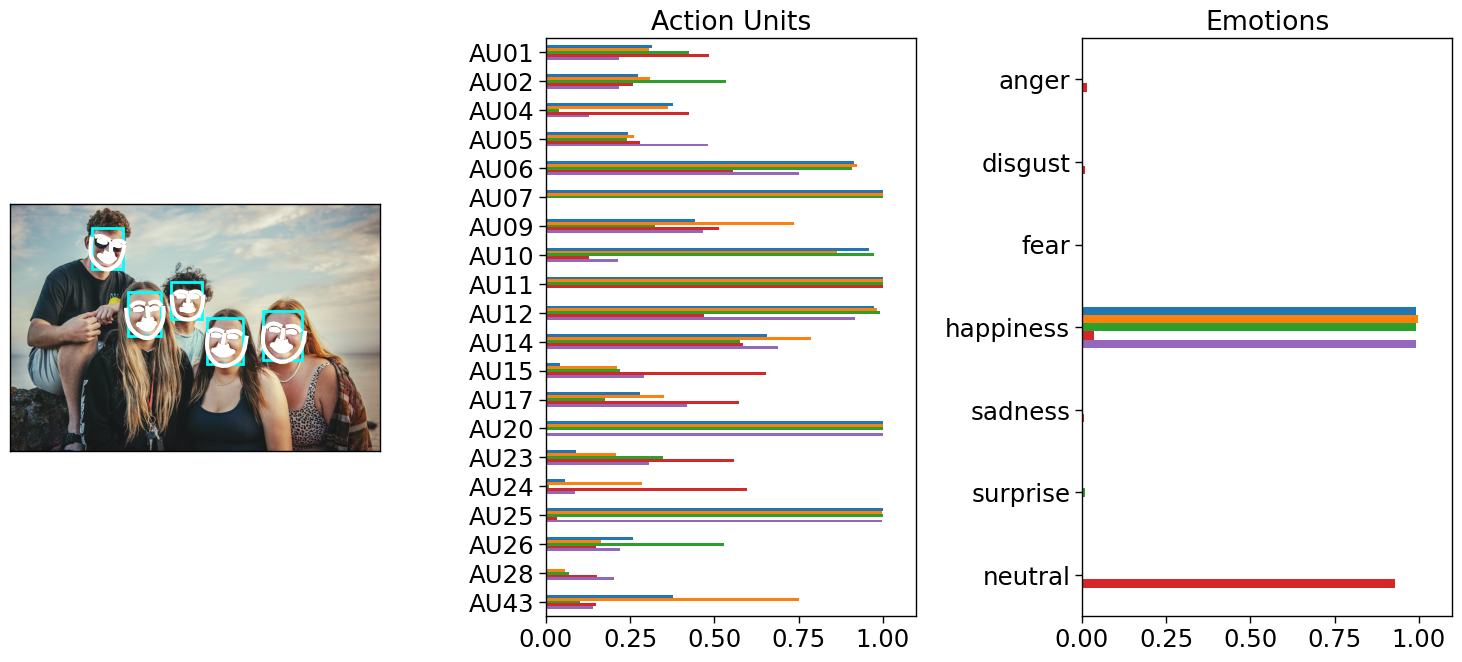

In [25]:
# Find the unique image file names in the 'input' column of the mixed_prediction DataFrame
unique_image_names = mixed_prediction['input'].unique()

# Choose the second unique image file name (index 1)
img_name = unique_image_names[1]

# Query the mixed_prediction DataFrame to select rows with the chosen image file name
selected_detections = mixed_prediction.query("input == @img_name")

# Generate visualizations of the face detections for the selected image
# with the option to exclude titles (add_titles=False)
axes = selected_detections.plot_detections(add_titles=False)
